In [4]:
# Basic Data Analysis Libraries
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in notebook itself
%matplotlib inline


In [5]:
# Load the CSV file generated from Step 1
df = pd.read_csv("german.csv")

# Preview the data
df.head()


,Status_Checking_Acc,Duration,Credit_History,Purpose,Credit_Amount,Savings,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors,...,Property,Age,Other_Installment_Plans,Housing,Number_Credits,Job,Liable_People,Telephone,Foreign_Worker,Target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [6]:
# Total rows & columns
print("Shape of data:", df.shape)


Shape of data: (1000, 21)


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Status_Checking_Acc      1000 non-null   object
 1   Duration                 1000 non-null   int64 
 2   Credit_History           1000 non-null   object
 3   Purpose                  1000 non-null   object
 4   Credit_Amount            1000 non-null   int64 
 5   Savings                  1000 non-null   object
 6   Employment_Since         1000 non-null   object
 7   Installment_Rate         1000 non-null   int64 
 8   Personal_Status_Sex      1000 non-null   object
 9   Other_Debtors            1000 non-null   object
 10  Residence_Since          1000 non-null   int64 
 11  Property                 1000 non-null   object
 12  Age                      1000 non-null   int64 
 13  Other_Installment_Plans  1000 non-null   object
 14  Housing                  1000 non-null   

In [8]:
# Step 3.1 - Check for Missing Values
missing_values = df.isnull().sum()
print("🔍 Missing Values in Each Column:")
print(missing_values)


🔍 Missing Values in Each Column:
Status_Checking_Acc        0
Duration                   0
Credit_History             0
Purpose                    0
Credit_Amount              0
Savings                    0
Employment_Since           0
Installment_Rate           0
Personal_Status_Sex        0
Other_Debtors              0
Residence_Since            0
Property                   0
Age                        0
Other_Installment_Plans    0
Housing                    0
Number_Credits             0
Job                        0
Liable_People              0
Telephone                  0
Foreign_Worker             0
Target                     0
dtype: int64


In [9]:
df["Target"].value_counts()


Target
1    700
2    300
Name: count, dtype: int64

In [11]:
df["Target"].value_counts(normalize=True) * 100


Target
1    70.0
2    30.0
Name: proportion, dtype: float64

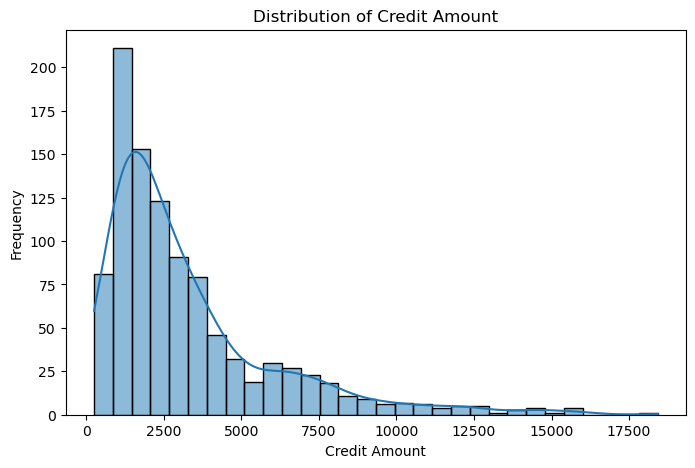

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["Credit_Amount"], bins=30, kde=True)
plt.title("Distribution of Credit Amount")
plt.xlabel("Credit Amount")
plt.ylabel("Frequency")
plt.show()


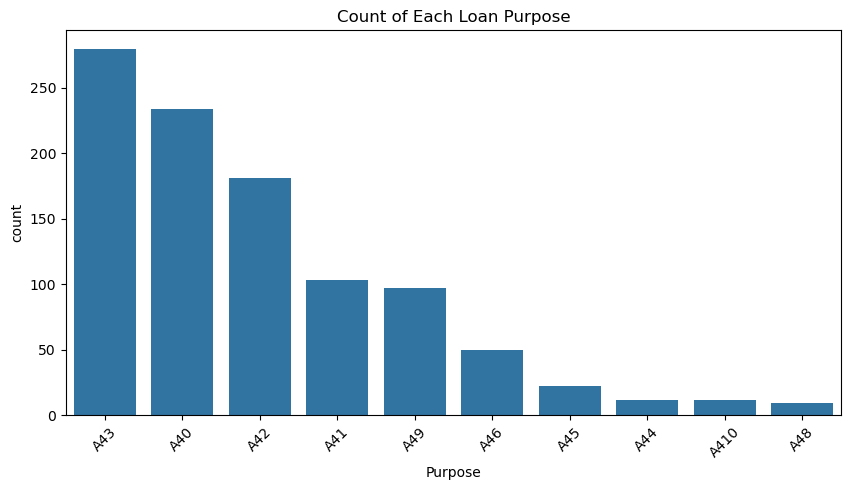

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Purpose", order=df["Purpose"].value_counts().index)
plt.title("Count of Each Loan Purpose")
plt.xticks(rotation=45)
plt.show()


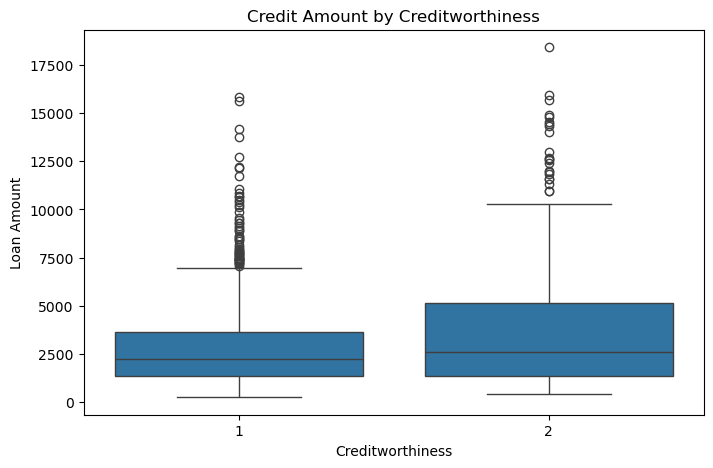

In [14]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Target", y="Credit_Amount")
plt.title("Credit Amount by Creditworthiness")
plt.xlabel("Creditworthiness")
plt.ylabel("Loan Amount")
plt.show()


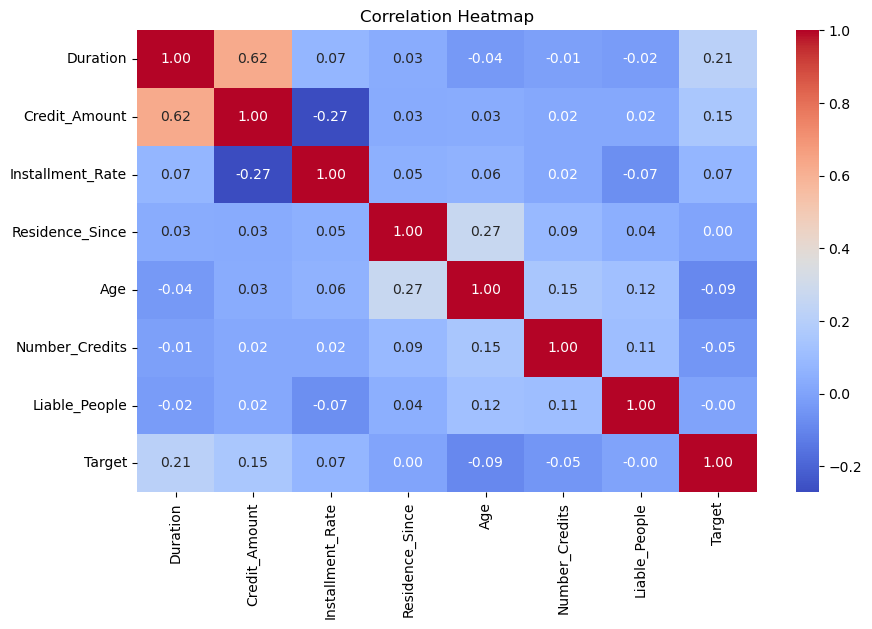

In [15]:
# Sirf numeric columns select karo
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
corr = numerical_cols.corr()

# Heatmap banana
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [17]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns
categorical_cols = df.select_dtypes(include="object").columns

# Apply LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("✅ Label Encoding Done!")


✅ Label Encoding Done!


In [18]:
from sklearn.preprocessing import StandardScaler

# Separate input features (X) and target variable (y)
X = df.drop("Target", axis=1)
y = df["Target"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature Scaling Completed!")


✅ Feature Scaling Completed!


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Train Size: {len(X_train)}, Test Size: {len(X_test)}")


✅ Train Size: 800, Test Size: 200


In [20]:
from sklearn.ensemble import RandomForestClassifier


In [21]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

# Fit the model to training data
rfc.fit(X_train, y_train)

print("✅ Random Forest model trained successfully!")


✅ Random Forest model trained successfully!


In [22]:
# Predict on the test data
y_pred = rfc.predict(X_test)

# First 10 predictions
print("🔮 Predictions for first 10 test records:")
print(y_pred[:10])


🔮 Predictions for first 10 test records:
[1 1 2 1 1 1 1 1 1 1]


In [23]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")


✅ Model Accuracy: 81.00%


In [24]:
from sklearn.metrics import classification_report

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           1       0.82      0.94      0.87       141
           2       0.77      0.51      0.61        59

    accuracy                           0.81       200
   macro avg       0.79      0.72      0.74       200
weighted avg       0.80      0.81      0.80       200



In [25]:
import joblib

# Save the trained model
joblib.dump(rfc, 'credit_model.pkl')

print("✅ Model saved as credit_model.pkl")


✅ Model saved as credit_model.pkl
